Best Route: [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 23, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Distance: 6.685240706259628


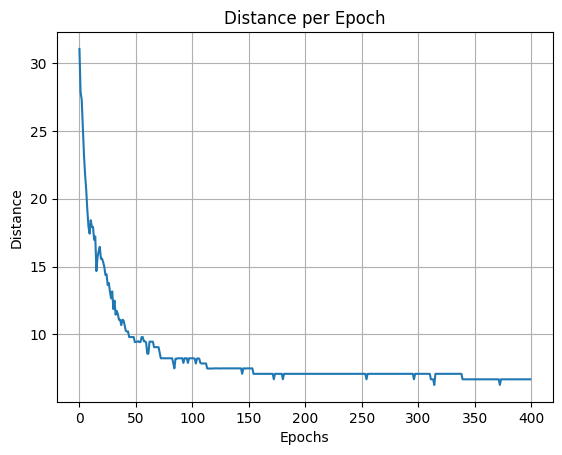

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

class GeneticAlgorithmTSP:
    def __init__(self, data, population_size=150, elite_size=30, mutation_rate=0.00001, generations=500):
        self.data = data
        self.population_size = population_size
        self.elite_size = elite_size
        self.mutation_rate = mutation_rate
        self.generations = generations
        self.labels = range(1, len(data) + 1)
        self.values = {'points': [], 'best_path': [], 'distance': []}

    def distance(self, route):
        total_distance = 0
        for i in range(len(route)):
            from_point = self.data[route[i]]
            to_point = self.data[route[(i + 1) % len(route)]]
            total_distance += math.sqrt((to_point[0] - from_point[0]) ** 2 + (to_point[1] - from_point[1]) ** 2)
        return total_distance

    def initial_population(self):
        population = []
        for _ in range(self.population_size):
            population.append(random.sample(range(len(self.data)), len(self.data)))
        return population

    def tournament_selection(self, population, k=5):
        tournament = random.sample(population, k)
        return min(tournament, key=lambda x: self.distance(x))

    def breed(self, parent1, parent2):
        start, end = sorted(random.sample(range(len(parent1)), 2))
        gene1 = parent1[start:end]
        gene2 = [item for item in parent2 if item not in gene1]
        return gene1 + gene2

    def crossover(self, population):
        offspring = []
        for _ in range(self.population_size):
            parent1 = self.tournament_selection(population)
            parent2 = self.tournament_selection(population)
            child = self.breed(parent1, parent2)
            offspring.append(child)
        return offspring

    def mutate(self, individual):
        for swapped in range(len(individual)):
            if random.random() < self.mutation_rate:
                swap_with = int(random.random() * len(individual))
                individual[swapped], individual[swap_with] = individual[swap_with], individual[swapped]
        return individual

    def mutate_population(self, population):
        mutated_population = []
        for individual in population:
            mutated_population.append(self.mutate(individual))
        return mutated_population

    def evolve(self, population):
        offspring = self.crossover(population)
        mutated_offspring = self.mutate_population(offspring)
        return mutated_offspring

    def optimize(self):
        population = self.initial_population()
        for _ in range(self.generations):
            population = self.evolve(population)
            population.sort(key=lambda x: self.distance(x))
            best_path = population[0]
            self.values['points'].append(([self.data[i][0] for i in best_path], [self.data[i][1] for i in best_path]))
            self.values['best_path'].append(population[0])
            self.values['distance'].append(self.distance(best_path))

def circle_point(radius, num_data):
    data = []
    theta = 2 * math.pi / num_data
    for i in range(num_data):
        x = radius * math.cos(i * theta)
        y = radius * math.sin(i * theta)
        data.append((x, y))
    return data

def plot_route(data, route):
    x = [point[0] for point in data]
    y = [point[1] for point in data]

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'bo')

    for i in range(len(route)):
        from_point = data[route[i]]
        to_point = data[route[(i + 1) % len(route)]]
        plt.plot([from_point[0], to_point[0]], [from_point[1], to_point[1]], 'k-')

    plt.title('Best Route')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

def plot_distance_epochs(distances):
    plt.plot(range(len(distances)), distances, linestyle='-')
    plt.title('Distance per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Distance')
    plt.grid(True)
    plt.show()

# Приклад використання
data = circle_point(1, 30)
ga_tsp = GeneticAlgorithmTSP(data, population_size=150, elite_size=30, mutation_rate=0.00001, generations=400)
ga_tsp.optimize()
print("Best Route:", ga_tsp.values['best_path'][-1])
print("Distance:", ga_tsp.values['distance'][-1])
#plot_route(data, ga_tsp.values['best_path'][-1])
plot_distance_epochs(ga_tsp.values['distance'])

# 30 - population_size=150, elite_size=30, mutation_rate=0.00001, generations=400)
# 50 - population_size=200, elite_size=60, mutation_rate=0.00001, generations=600)
# 100 - population_size=250, elite_size=100, mutation_rate=0.00001, generations=600)

In [4]:
from Visualizer import *

# aco_plot = Visualizer(data, ga_tsp.values, ga_tsp.labels, 'TEST', 50)
# aco_plot.graph(-1)
# aco_plot.animation()

d:\Projects\SwarmIntelligence\lab 4\plot.py:12: SyntaxWarning: invalid escape sequence '\G'
  Path(f'{path}\\aco\Graph').mkdir(parents=True, exist_ok=True)
d:\Projects\SwarmIntelligence\lab 4\plot.py:13: SyntaxWarning: invalid escape sequence '\A'
  Path(f'{path}\\aco\Animation').mkdir(parents=True, exist_ok=True)
d:\Projects\SwarmIntelligence\lab 4\plot.py:14: SyntaxWarning: invalid escape sequence '\D'
  Path(f'{path}\\aco\Distance').mkdir(parents=True, exist_ok=True)
d:\Projects\SwarmIntelligence\lab 4\plot.py:39: SyntaxWarning: invalid escape sequence '\{'
  plt.savefig(f'{path}\\aco\Graph\{self.filename}.png')
d:\Projects\SwarmIntelligence\lab 4\plot.py:39: SyntaxWarning: invalid escape sequence '\G'
  plt.savefig(f'{path}\\aco\Graph\{self.filename}.png')
d:\Projects\SwarmIntelligence\lab 4\plot.py:82: SyntaxWarning: invalid escape sequence '\{'
  anim.save(f'{path}\\aco\Animation\{self.filename}.gif', dpi=120, writer='pillow')
d:\Projects\SwarmIntelligence\lab 4\plot.py:82: Synta

In [2]:
def read_rsp_file(file_name):
    with open(file_name, 'r') as file:
        return file.readlines()


print(read_rsp_file('xqf131.tsp'))

['NAME : xqf131\n', 'COMMENT : Bonn VLSI data set with 131 points\n', 'COMMENT : Uni Bonn, Research Institute for Discrete Math\n', 'COMMENT : Contributed by Andre Rohe\n', 'TYPE : TSP\n', 'DIMENSION : 131\n', 'EDGE_WEIGHT_TYPE : EUC_2D\n', 'NODE_COORD_SECTION\n', '1 0 13\n', '2 0 26\n', '3 0 27\n', '4 0 39\n', '5 2 0\n', '6 5 13\n', '7 5 19\n', '8 5 25\n', '9 5 31\n', '10 5 37\n', '11 5 43\n', '12 5 8\n', '13 8 0\n', '14 9 10\n', '15 10 10\n', '16 11 10\n', '17 12 10\n', '18 12 5\n', '19 15 13\n', '20 15 19\n', '21 15 25\n', '22 15 31\n', '23 15 37\n', '24 15 43\n', '25 15 8\n', '26 18 11\n', '27 18 13\n', '28 18 15\n', '29 18 17\n', '30 18 19\n', '31 18 21\n', '32 18 23\n', '33 18 25\n', '34 18 27\n', '35 18 29\n', '36 18 31\n', '37 18 33\n', '38 18 35\n', '39 18 37\n', '40 18 39\n', '41 18 41\n', '42 18 42\n', '43 18 44\n', '44 18 45\n', '45 25 11\n', '46 25 15\n', '47 25 22\n', '48 25 23\n', '49 25 24\n', '50 25 26\n', '51 25 28\n', '52 25 29\n', '53 25 9\n', '54 28 16\n', '55 28 2

In [3]:
def read_tsp_file(file_path):
    node_coords = []
    with open(file_path, 'r') as file:
        for line in file:
            if line.strip() == "NODE_COORD_SECTION":
                break
        for line in file:
            if line.strip() == "EOF":
                break
            parts = line.strip().split()
            node_coords.append((float(parts[1]), float(parts[2])))
    return node_coords

# Приклад використання
file_path = 'xqf131.tsp'
node_coords = read_tsp_file(file_path)
print(node_coords)


[(0.0, 13.0), (0.0, 26.0), (0.0, 27.0), (0.0, 39.0), (2.0, 0.0), (5.0, 13.0), (5.0, 19.0), (5.0, 25.0), (5.0, 31.0), (5.0, 37.0), (5.0, 43.0), (5.0, 8.0), (8.0, 0.0), (9.0, 10.0), (10.0, 10.0), (11.0, 10.0), (12.0, 10.0), (12.0, 5.0), (15.0, 13.0), (15.0, 19.0), (15.0, 25.0), (15.0, 31.0), (15.0, 37.0), (15.0, 43.0), (15.0, 8.0), (18.0, 11.0), (18.0, 13.0), (18.0, 15.0), (18.0, 17.0), (18.0, 19.0), (18.0, 21.0), (18.0, 23.0), (18.0, 25.0), (18.0, 27.0), (18.0, 29.0), (18.0, 31.0), (18.0, 33.0), (18.0, 35.0), (18.0, 37.0), (18.0, 39.0), (18.0, 41.0), (18.0, 42.0), (18.0, 44.0), (18.0, 45.0), (25.0, 11.0), (25.0, 15.0), (25.0, 22.0), (25.0, 23.0), (25.0, 24.0), (25.0, 26.0), (25.0, 28.0), (25.0, 29.0), (25.0, 9.0), (28.0, 16.0), (28.0, 20.0), (28.0, 28.0), (28.0, 30.0), (28.0, 34.0), (28.0, 40.0), (28.0, 43.0), (28.0, 47.0), (32.0, 26.0), (32.0, 31.0), (33.0, 15.0), (33.0, 26.0), (33.0, 29.0), (33.0, 31.0), (34.0, 15.0), (34.0, 26.0), (34.0, 29.0), (34.0, 31.0), (34.0, 38.0), (34.0, 41.0